Name: Seyyid Hikmet Celik

ID: 181201047

Course: BIL470

In [1]:
# veri analizi icin
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn import metrics

# grafikler icin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# egitim icin, kendi implementasyonumuz
from kmeans import KMeansClusterClassifier

# Reading and Tuning Dataset

In [2]:
iris = pd.read_csv('Iris.csv')

# tur stringlerini sayilara ceviriyorum
iris = iris.drop(columns='Id')
species = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['Species'] = [species[item] for item in iris['Species']]

# Splitting Dataset to Train and Test

Veri setini karıştırıyoruz (shuffle) ve %80 eğitim, %20 test verisi olacak şekilde ayrıştırıyoruz.

In [3]:
X = iris.values.tolist()
y = []

for row in X:
    y.append(int(row[4]))
    del row[4]

X = pd.Series(X)
y = pd.Series(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_train_list = X_train.values.tolist()
y_train_list = y_train.values.tolist()
X_test_list = X_test.values.tolist()
y_test_list = y_test.values.tolist()

# Plotting Elbow Curve

Optimum küme sayısını bulmak için küme merkezlerinden ortalama mesafelere bakıp grafikte elbow (dirsek) noktasını bulmaya çalışıyoruz. Bu grafik için optimum dirsek noktasının 3 olduğunu söyleyebiliriz.

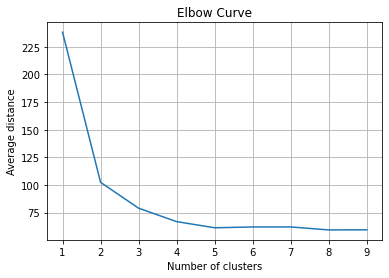

In [4]:
avg_dist = []
clusters = range(1, 10)

for i in clusters:
    each_clf = KMeansClusterClassifier(n_cluster = i)
    each_clf.fit(X_train_list)
    avg_dist.append(each_clf.centroid)

plt.plot(clusters, avg_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Elbow Curve')
plt.grid(True)

# Training with the KMeans Cluster Classifier

Kendi implement ettiğimiz öbekleme sınıfı ve yukarıda elbow (dirsek) grafiğinden bulduğumuz 3 değeri ile modeli eğitiyoruz.

In [5]:
clf = KMeansClusterClassifier(n_cluster = 3)
clf.fit(X_train_list)

# Predicting Class of Test Values

Test verilerini tahmin ediyoruz ve beklenen değerlere benzer tahminler yaptığımızı görebiliyoruz ki bunları sonuçlar kısmında daha detaylı görebiliriz.

In [6]:
yhat = clf.predict(X_test_list)
print('Test Features Expected Classification')
print(y_test_list)
print('Prediction')
print(yhat)

print()

xhat = clf.predict(X_train_list)
print('Train Features Expected Classification')
print(y_train_list)
print('Prediction')
print(xhat)

Test Features Expected Classification
[2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1]
Prediction
[2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1]

Train Features Expected Classification
[1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2]
Prediction
[1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1,

# RESULTS

## 3D Cluster Plot

3 öbeğe ayrılan verilerin 3 boyutlu grafiğini çizdiriyoruz ki grafikte öbeklerin iyi bir şekilde ayrıştığı görülebiliyor.

/var/folders/kr/f0qmqqxs5p19_gxt95ch4jn00000gn/T/ipykernel_25766/454812116.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
/var/folders/kr/f0qmqqxs5p19_gxt95ch4jn00000gn/T/ipykernel_25766/454812116.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(labels, [1, 2, 0]).astype(np.f

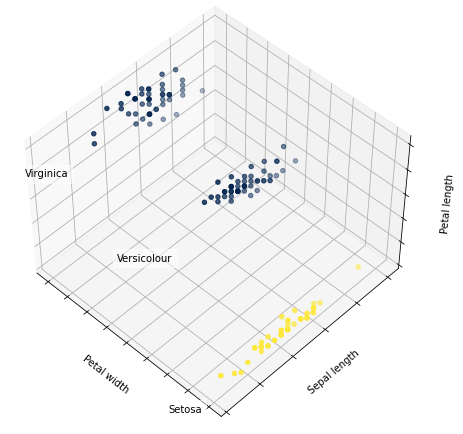

In [7]:
X = iris.iloc[:, 1:5].values
y = pd.Categorical(iris['Species']).codes


fig = plt.figure(1, figsize=(6, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
plt.cla()

clf = KMeansClusterClassifier(n_cluster=3)
clf.fit(X)
labels = clf.predict(X)

labels = np.array(labels)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean() + 1.5, X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

y = np.choose(labels, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, cmap = 'cividis')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

## Confusion Matrix of Test

Aşağıda test değerleri için elde etmiş olduğumuz Confusion Matrix görülebilir. Bu matriste değerler ne kadar orta çaprazda toplanırsa o kadar doğru tahmin yaptığımızı gösteriyor ve bakıldığında, köşelerin 0 ya da 0'a çok yakın değerler olduğu ve bu da uygulamış olduğumuz k-means öbekleme algoritmasının test verileri için gayet iyi çalıştığını gösteriyor.

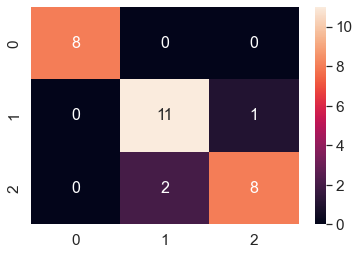

In [8]:
y_pred2 = pd.Series(yhat)
y_test2 = pd.Series(y_test_list)
mt = metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sbn.set(font_scale=1.4)
sbn.heatmap(df_cm, annot=True, annot_kws={'size': 16})
plt.show()

## Confusion Matrix of Train

Aşağıda train değerleri için elde etmiş olduğumuz Confusion Matrix görülebilir. Bakıldığında, köşelerin 0 ya da 0'a çok yakın değerler olduğu ve bu da uygulamış olduğumuz k-means öbekleme algoritmasının train verileri için de gayet iyi çalıştığını gösteriyor.

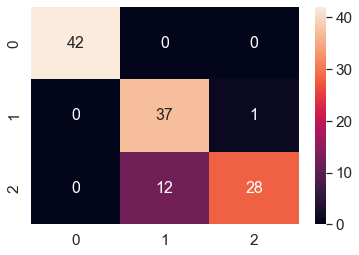

In [9]:
x_pred2 = pd.Series(xhat)
x_test2 = pd.Series(y_train_list)
mt = metrics.confusion_matrix(x_test2, x_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sbn.set(font_scale=1.4)
sbn.heatmap(df_cm, annot=True, annot_kws={'size': 16})
plt.show()

## F1-Score

Aşağıda test ve train tahminleri için f1 skorlarının 1'e çok yakın olduğu görülüyor ve bu da yine tahminlerimizin büyük oranda doğru çıktığını doğruluyor.

In [10]:
f1 = metrics.f1_score(y_test2, y_pred2, average='weighted')
print('F1-Score Test:')
print(f1)

f2 = metrics.f1_score(x_test2, x_pred2, average='weighted')
print('F1-Score Train:')
print(f2)

F1-Score Test:
0.8993684210526316
F1-Score Train:
0.889880059970015


## Accuracy

Yine benzer şekilde, 1'e yakın accuracy değerleri tahminlerimizin doğruluğunun iyi olduğunu gösteriyor.

In [11]:
accuracy = metrics.accuracy_score(y_test2, y_pred2)
print('Accuracy Test:')
print(accuracy)

accuracy2 = metrics.accuracy_score(x_test2, x_pred2)
print('Accuracy Train:')
print(accuracy2)

Accuracy Test:
0.9
Accuracy Train:
0.8916666666666667


## Precision

Tahminlerin kesinliğinin iyi olduğunu da yine 1'e yakın değerlerden görebiliyoruz.

In [12]:
precision = metrics.precision_score(y_test2, y_pred2, average='weighted')
print('Precision Test:')
print(precision)

precision2 = metrics.precision_score(x_test2, x_pred2, average='weighted')
print('Precision Train:')
print(precision2)

Precision Test:
0.9014245014245014
Precision Train:
0.9109547267182735


## Recall

Tahminlerin beklenen değerlerle ne kadar ilişkili olduğunu yine aşağıdaki 1'e yakın olan değerlerden görebiliyoruz.

In [13]:
recall = metrics.recall_score(y_test2, y_pred2, average='weighted')
print('Recall Test:')
print(recall)

recall2 = metrics.recall_score(x_test2, x_pred2, average='weighted')
print('Recall Train:')
print(recall2)

Recall Test:
0.9
Recall Train:
0.8916666666666667


## Plot of ROC Curve and Value of AUC

ROC eğrilerinin birbirlerine yakın olduğunu ve AUC değerlerinin de 1'e yakınsadığını görüyoruz ki bu da yine hem train hem test tahminlerimizin gayet iyi olduğunu gösteriyor.

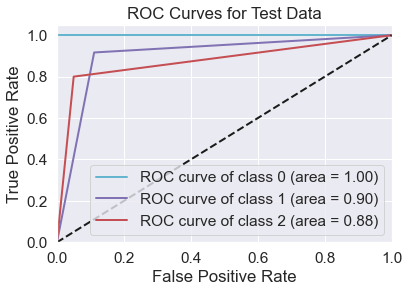

Macro Auc value:
0.925925925925926


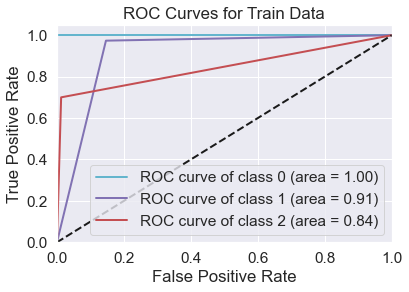

Macro Auc value:
0.919140457851947


In [14]:
y_testb = label_binarize(y_test2, classes=[0, 1, 2])
y_predb = label_binarize(y_pred2, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:, i], y_predb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr = mean_tpr + np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr = mean_tpr / 3
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

colors = cycle(['c', 'm', 'r'])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Test Data')
plt.legend(loc='lower right')
plt.show()
print('Macro Auc value:')
print(roc_auc['macro'])

x_testb = label_binarize(x_test2, classes=[0, 1, 2])
x_predb = label_binarize(x_pred2, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(x_testb[:, i], x_predb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Train Data')
plt.legend(loc='lower right')
plt.show()
print('Macro Auc value:')
print(roc_auc['macro'])

Tüm değerlendirmeler ve değişik ölçme yöntemlerine bağlı sonuçlar göz önüne alındığında uygulamış olduğumuz algoritmanın hem test hem train verileri için iyi tahmin yaptığını ve ayrıca test tahminlerinin, train tahminlerinden uzak olmadığını hatta çok yakın olduğunu görebiliyoruz ki bu da yine K-means Öbekleme algoritmasının ne kadar iyi çalıştığını ve doğru uygulamış olduğumuzu bize gösteriyor.

# Comparison with the Decision Tree Classifier

Karar ağacı modelinde tüm değerlerimiz daha iyi ve stabil çıkmıştı. (Öbeklemede bazı çalıştırdıklarımda rastgeleliğe bağlı olarak daha iyi çıktı.) Sayısal olarak karşılaştırmak ve iki model için daha önceden bulduğumuz accuracy değerlerine bakmak istersek yine görüyoruz ki karar ağacı accuracy değerleri daha iyi.

_DT Accuracy Test: 1.0_

_DT Accuracy Train: 0.9416666666666667_


_KMC Accuracy Test: 0.9_

_KMC Accuracy Train: 0.8916666666666667_

Mesela, buradaki öbekleme modelinde her çalıştırdığımda çok daha farklı sonuçlar alabiliyorum çünkü öbek merkezlerini başlangıçta rastgele seçiyorum. Bu durum, öbekleme modelinin performansının düşük olduğunu göstermiyor fakat rastgeleliğe çok bağlı olduğunu gösteriyor. Bu yüzden etiketlenmiş verileri olan birinin supervised olan karar ağacı modelini kullanması daha iyi olabilir fakat elinizde etiketlenmemiş veriler varsa unsupervised olan k-means öbekleme algoritmasını kullanmak daha iyidir, çünkü k-means'in etikete ihtiyacı yoktur. Ayrıca, k-means modelinde başlangıç öbek merkezlerini rastgele değil de belirli özelliklere göre seçmek de modeli daha iyi hale getirmek için bir seçenek.

# KMeansClusterClassifier

Yukarıda veri setini eğitmek için kullanmış olduğumuz k-means öbekleme sınıfı aşağıdaki kod parçasında görülebilir.

In [15]:
# kmeans.py
import random

class KMeansClusterClassifier():
    # Nesne olusturuldugunda baslangic degerlerinin atandigi fonksiyon
    def __init__(self, n_cluster = 3):
        self.n_cluster = n_cluster
        self.centroid = 0
        # 100 iterasyon sonunda centroidler bulunsun.
        # Iterasyon sayisi degistirilebilir.
        self.iterations = 100
        self.centroids = []
    
    # Modeli egittigimiz fonksiyon, bir sey dönmüyor.
    def fit(self, X) -> None:
        # Centroidleri olusturuyorum.
        numoffeatures = len(X[0])

        # Agirliklari veriyorum.
        weights = [[0, 0]] * numoffeatures
        for i in range(numoffeatures):
            weights[i] = [min(list(map(list, zip(*X)))[i]), max(list(map(list, zip(*X)))[i])]

        for i in range(self.n_cluster): 
            centroid_list = []

            # centroidleri rastgele seedliyorum.
            random.seed(i)
            for j in range(numoffeatures):
                centroid_list.append(weights[j][0]  + random.random() * (weights[j][1] - weights[j][0])) 
            self.centroids.append(centroid_list)


        # Etiketleri guncelliyorum.
        self.centroid = 0
        
        features = []
        for i in range(numoffeatures):
            features.append(list(map(list, zip(*X)))[i])

        # Euclid distance
        labels = []
        for i in range(len(X)):
            mindist = 10000000000
            eachlabel = -1

            for j in range(self.n_cluster):
                clustdist = 0

                for k in range(numoffeatures):
                    clustdist += pow(features[k][i] - self.centroids[j][k], 2)

                clustdist = pow(clustdist, 0.5) # sqrt(clustdist)

                if mindist > clustdist:
                    eachlabel = j
                    mindist = clustdist
                    

            self.centroid += mindist
            labels.append(eachlabel)
        
        # Verilen iterasyon sayisi kadar centroid ve etiketleri guncelliyorum.
        for i in range(self.iterations):
            # Centroidleri guncelliyorum.
            centroid_list = []

            for j in range(self.n_cluster):
                centroid_list.append([0] * numoffeatures)

            c_count = [0] * self.n_cluster

            for index, element in enumerate(X):
                for j in range(self.n_cluster):
                    if labels[index] == j:
                        for k in range(numoffeatures):
                            centroid_list[j][k] += element[k]
                        c_count[j] += 1
            
            for j in range(self.n_cluster):
                if c_count[j] != 0:
                    centroid_list[j] = [k / c_count[j] for k in centroid_list[j]]

            self.centroids = centroid_list

            # Etiketleri guncelliyorum.
            self.centroid = 0
            
            features = []
            for i in range(numoffeatures):
                features.append(list(map(list, zip(*X)))[i])

            # Euclid distance
            labels = []
            for i in range(len(X)):
                mindist = 10000000000
                eachlabel = -1

                for j in range(self.n_cluster):
                    clustdist = 0

                    for k in range(numoffeatures):
                        clustdist += pow(features[k][i] - self.centroids[j][k], 2)

                    clustdist = pow(clustdist, 0.5) # sqrt(clustdist)

                    if mindist > clustdist:
                        eachlabel = j
                        mindist = clustdist

                self.centroid += mindist
                labels.append(eachlabel)
        return

    # Model egitildikten sonra egitilen modele gore obeklenmis etiket listesini donen fonksiyon
    def predict(self, X) -> list:
        # Etiketleri guncelliyorum.
        self.centroid = 0
        numoffeatures = len(X[0])

        features = []
        for i in range(numoffeatures):
            features.append(list(map(list, zip(*X)))[i])

        # Euclid distance
        labels   = []
        for i in range(len(X)):
            mindist = 10000000000
            eachlabel = -1

            for j in range(self.n_cluster):
                clustdist = 0
                for k in range(numoffeatures):
                    clustdist += pow(features[k][i] - self.centroids[j][k], 2)
                clustdist = pow(clustdist, 0.5) # sqrt(clustdist)

                if mindist > clustdist:
                    eachlabel = j
                    mindist = clustdist

            self.centroid += mindist
            labels.append(eachlabel)

        for i in range(len(labels)): 
            labels[i] = labels[i] + 1

            if labels[i] == self.n_cluster:
                labels[i] = 0

        return labels

# References

[1] https://www.anaconda.com

[2] https://jupyter.org

[3] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[4] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

[5] https://en.wikipedia.org/wiki/K-means_clustering

[6] https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

[7] https://realpython.com/k-means-clustering-python

[8] https://www.youtube.com/watch?v=AFS8LUgBMS0